[View in Colaboratory](https://colab.research.google.com/github/SKhan97/Machine-Learning---Bootcamp/blob/master/Linear_Regression_Numpy.ipynb)

In [0]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
m = 100 #Number of datapoints required

def makedata(numdatapoints):
  x = np.linspace(-1, 1, numdatapoints)
  x = x.reshape(-1, 1) # -1 indicates as many rows as needed, 1 indicates only one column
  
  coeffs = [1, -15, 1, 7]
  y = np.polyval(coeffs, x) + 2 * np.random.rand(numdatapoints, 1)
  y = y.reshape(-1, 1)
  
  return x, y

powers = [2, 3] #Will be reliant on input^2 and input^3 terms

def makefeatures(powers, x):
  features = np.ones((x.shape[0], len(powers)))
  
  for i in range(len(powers)):
    features[:, i] = (x**powers[i])[:, 0]
    
  print(features)
  
  return(features)

data, labels = makedata(m)
X = makefeatures(powers,data)

[[ 1.00000000e+00 -1.00000000e+00]
 [ 9.60004081e-01 -9.40610059e-01]
 [ 9.20824406e-01 -8.83619379e-01]
 [ 8.82460973e-01 -8.28978490e-01]
 [ 8.44913784e-01 -7.76637923e-01]
 [ 8.08182838e-01 -7.26548208e-01]
 [ 7.72268136e-01 -6.78659877e-01]
 [ 7.37169677e-01 -6.32923460e-01]
 [ 7.02887460e-01 -5.89289487e-01]
 [ 6.69421488e-01 -5.47708490e-01]
 [ 6.36771758e-01 -5.08130999e-01]
 [ 6.04938272e-01 -4.70507545e-01]
 [ 5.73921028e-01 -4.34788658e-01]
 [ 5.43720029e-01 -4.00924870e-01]
 [ 5.14335272e-01 -3.68866710e-01]
 [ 4.85766758e-01 -3.38564710e-01]
 [ 4.58014488e-01 -3.09969401e-01]
 [ 4.31078461e-01 -2.83031313e-01]
 [ 4.04958678e-01 -2.57700977e-01]
 [ 3.79655137e-01 -2.33928923e-01]
 [ 3.55167840e-01 -2.11665682e-01]
 [ 3.31496786e-01 -1.90861786e-01]
 [ 3.08641975e-01 -1.71467764e-01]
 [ 2.86603408e-01 -1.53434148e-01]
 [ 2.65381084e-01 -1.36711467e-01]
 [ 2.44975003e-01 -1.21250254e-01]
 [ 2.25385165e-01 -1.07001038e-01]
 [ 2.06611570e-01 -9.39143501e-02]
 [ 1.88654219e-01 -8

In [0]:
n = X.shape[1] #Number of features

class LinearModel():
  def __init__(self):
    self.weights = np.random.randn(n, 1) #Randomly initialise object features
    self.bias = np.random.randn(1)
    
  def forward(self, x):
    out = np.matmul(x,self.weights) + self.bias # h = X*theta + bias
    
    return out

mymodel = LinearModel()

def MSE(h, y): #Mean Squared Error - measure of how 'good' model is
  diff = h - y
  J = 0.5 * np.matmul(diff.T,diff)/batch_size 
  return float(J)

def SGD(datain, batch_size): #Stochastic Gradient Descent - method of reducing
                             #the error by going against gradient direction
  sample = np.random.randint(m, size = batch_size)
  
  batchfeatures, batchlabels = datain[sample], labels[sample]
  
  prediction = mymodel.forward(batchfeatures)
  
  cost = MSE(prediction, batchlabels)
  
  
  dJdw = np.matmul(batchfeatures.T, prediction - batchlabels)/batch_size
  mymodel.weights -= lr * dJdw
  
  dJdb = np.sum(prediction - batchlabels)/batch_size
  mymodel.bias -= lr * dJdb
  
  return cost

def train(datain):
  costs = []
  
  for e in range(epochs):
    
    #print('b', mymodel.bias[0])
    #print('w', mymodel.weights)
    
    cost = SGD(datain, batch_size)
    costs.append(cost)
    
    #print('Epoch ', e , 'Cost ', cost)
    
  return costs

#Variables which should be played around with to give optimal results
lr = 0.08 #Learning rate
epochs = 1000 #Number of iterations over the training data
batch_size = 32 

datain = X
costs = train(datain)
  

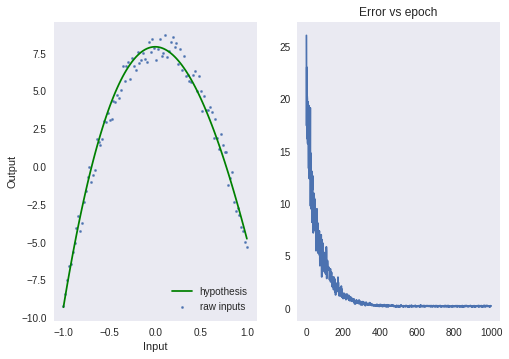

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(121) #1 figure high, 2 wide, 1st figure
ax1.set_xlabel('Input')
ax1.set_ylabel('Output')
ax1.scatter(data, labels, s =5, label = 'raw inputs')
ax1.plot(data, mymodel.forward(datain), c = 'g', label = 'hypothesis')
ax1.grid()
ax1.legend()

ax2 = fig.add_subplot(122)
ax2.set_title('Error vs epoch')
ax2.grid()
ax2.plot(costs)

plt.show()